# PyTorch - Wstęp
PyTorch operuje na tensorach, które są strukturą danych podobną do tablic numpy:

In [ ]:
import torch
t1 = torch.tensor([[1., 0], [2, 3]])
print(t1)
print(t1.numpy())
print(torch.tensor(t1.numpy()))

tensor([[1., 0.],
        [2., 3.]])
[[1. 0.]
 [2. 3.]]
tensor([[1., 0.],
        [2., 3.]])


In [ ]:
t1.shape

torch.Size([2, 2])

To co odróżnia tensory od tablic, to ich zdolność do przechowywania informacji o operacjach i liczenia z nich gradientu. 

Przypomnienie: przykładowo, dwuwymiarowy gradient z funkcji $f(x,y) = x\cdot y + y$  w punkcie $x=1000, y=2$:

In [ ]:
x = torch.tensor([1000.], requires_grad = True)
y = torch.tensor([2.], requires_grad = True)
print('x:', x)
print('x:', y)
print('dt3/da:', x.grad)
print('dt3/db:', y.grad)
t3 = x * y + y
t3.backward()
print('dt3/da:', x.grad)
print('dt3/db:', y.grad)

x: tensor([1000.], requires_grad=True)
x: tensor([2.], requires_grad=True)
dt3/da: None
dt3/db: None
dt3/da: tensor([2.])
dt3/db: tensor([1001.])


# Zadanie 1: Regresja z użyciem tensorów, ale ręcznym liczeniem funkcji kosztu

## Zadania do wykonania
1. Zadaniem jest zrobienie regresji funkcji liniowej $y = 2x - 1$ w dziedzinie (0,3) przy ręcznym liczeniu funkcji błędu z wykorzystaiem następujących metod:
```
X = torch.arange(0, 3, 0.1)
a = torch.randn(2, requires_grad=True) 
N = 1000 
[matrix].backward()
```
2. Wykonaj wykres epoka vs błąd
3. (dodatkowe) Wykonaj wykres epoka vs błąd (y -> log(y))

Text(0.5, 1.0, 'log( MSE ) throughout epochs')

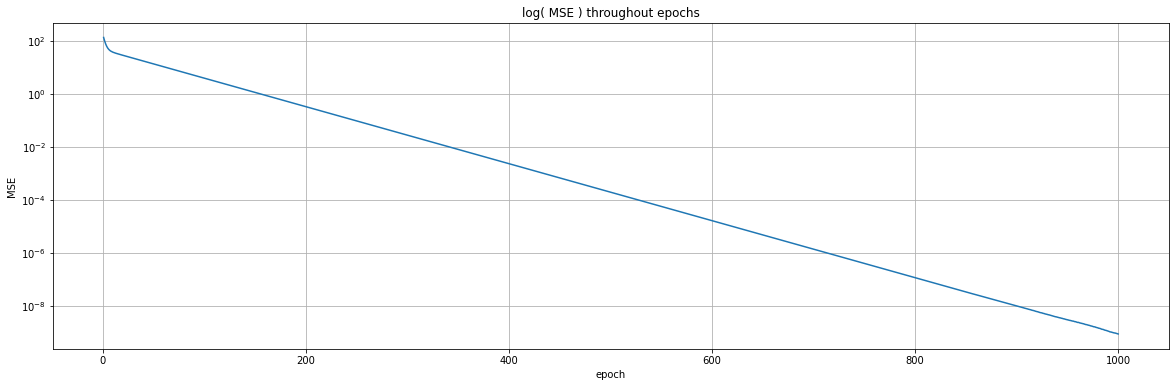

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

X = torch.arange(0, 3, 0.1)
a = torch.randn(2, requires_grad=True) 
N = 1000 
y = 2*X - 1
# y = X*a[0] + a[1]
# y.backward()
# print(y)

learning_rate = 1e-3
costs = []

for epoch in range(N):
    # y_predicted = a[0]*x + a[1]
    cost = torch.sum((y - (X*a[0] +a[1]) )**2 / x.numel())
    costs.append(cost)
    cost.backward()
    with torch.no_grad():
        a -= learning_rate*a.grad
        # a.grad.data.zero_
        a.grad.zero_()

cost_f = [c.detach().numpy() for c in costs]
f = plt.figure(1, figsize=(20, 6))
plt.plot(range(1, len(costs)+1), cost_f)
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.grid()
plt.yscale('log')
plt.title("log( MSE ) throughout epochs")

# Zadanie 2: Regresja liniowa z użyciem tensorów i torch.nn

Dokonamy teraz regresji liniowej z wykorzystaniem wyłącznie metod zaimplementowanych w pytorchu, zaczynamy od naszego zbioru danych:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as nF

In [ ]:
X = torch.tensor([1., 2, 3, 4, 5, 6, 7, 8])
f = torch.tensor([1.2, 2.8, 5.3, 6.4, 7.5, 8.8, 10, 11.2])
X = X.reshape(8,1) #we need matrix 
f = f.reshape(8,1)

In [ ]:
help(TensorDataset)

Help on class TensorDataset in module torch.utils.data.dataset:

class TensorDataset(Dataset)
 |  TensorDataset(*args, **kwds)
 |  
 |  Dataset wrapping tensors.
 |  
 |  Each sample will be retrieved by indexing tensors along the first dimension.
 |  
 |  Args:
 |      *tensors (Tensor): tensors that have the same size of the first dimension.
 |  
 |  Method resolution order:
 |      TensorDataset
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |  
 |  __init__(self, *tensors: torch.Tensor) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'tensors': typing.Tuple[torch.Tensor, ...]}
 |  
 |  __orig_bases__ = (torch.utils.data.dataset.Dataset[typing.Tuple[torch....
 |  
 |  __parameters__ = ()
 |  
 |  ---

In [ ]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [ ]:
train_data = TensorDataset(X, f)
train_data[0]

(tensor([1.]), tensor([1.2000]))

In [ ]:
batch_size = 2
train_dl = DataLoader(train_data, batch_size, shuffle = True)

In [ ]:
model = nn.Linear(1, 1) #explain
print(model.weight)
print(model.bias)
list(model.parameters())
nF.mse_loss #check it out
torch.optim.SGD(model.parameters(), lr=1e-5) #check it out

Parameter containing:
tensor([[-0.7608]], requires_grad=True)
Parameter containing:
tensor([-0.0793], requires_grad=True)


SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
#hint! find these funtions:

#predict:
#calculate loss
#calculate gradient
#optimise coefficients
#reset grad

## Zadania do wykonania
1. Wykonaj regresję liniową przy wykorzystaniu zbioru danych na początku tego zadania.
2. Wykonaj wykres bład vs epoka.

Parameter containing:
tensor([[0.1676]], requires_grad=True)
Parameter containing:
tensor([0.5732], requires_grad=True)


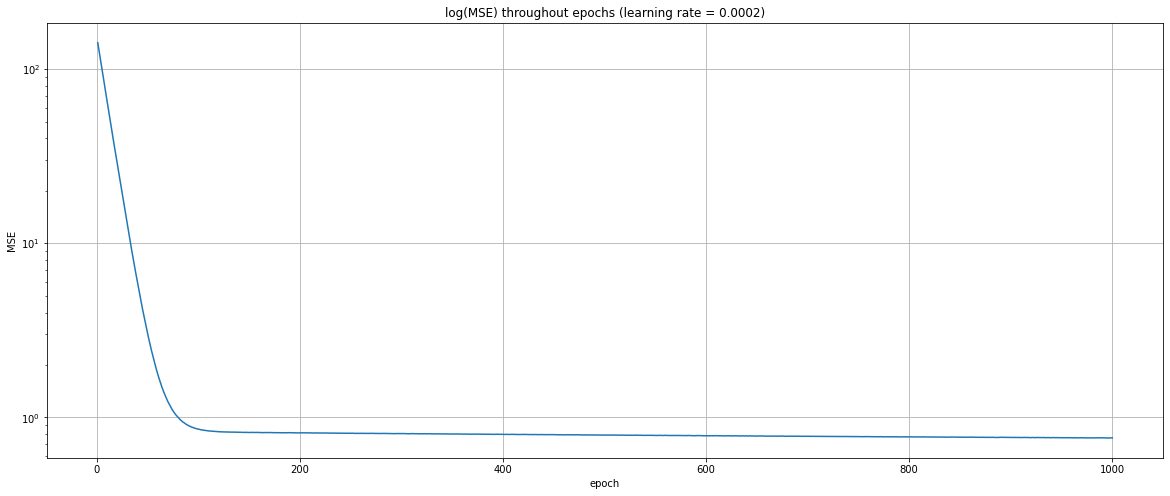

In [ ]:
X = torch.tensor([1., 2, 3, 4, 5, 6, 7, 8])
f = torch.tensor([1.2, 2.8, 5.3, 6.4, 7.5, 8.8, 10, 11.2])
X = X.reshape(8,1) #we need matrix 
f = f.reshape(8,1)

learning_rate = 2e-4

train_data = TensorDataset(X, f)

batch_size = 2
train_dl = DataLoader(train_data, batch_size, shuffle = True)

model = nn.Linear(1, 1, bias=True)
print(model.weight)
print(model.bias)
list(model.parameters())
crit = nF.mse_loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

N = 1000
loss_f = []
for epoch in range(N):
    loss_ = 0.0
    for x,y in train_dl:
        y_predicted = model(x)
        loss = crit(y_predicted, y)
        loss_ += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_f.append(loss_)

f = plt.figure(1, figsize=(20, 8))
plt.plot(range(1, len(loss_f)+1), loss_f)
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.yscale('log')
plt.title(f"log(MSE) throughout epochs (learning rate = {learning_rate})");
plt.grid()

# Zadanie 3: Użycie liniowego modelu torch.nn do analizy wybranego zestawu danych

Wykonamy regresję liniową na zbiorze który prawdopodobnie (!) jest liniowy.
## Zadania do wykonania
1. Zbadaj i opisz zbiór danych dostarczony do zadania.
2. Wykonaj regresję liniową (dopasowanie do 8-10 elementów). 
3. Utwórz wykres bład vs epoka.
4. Czy dany zbiór jest liniowy? Co na to wskazuje?
5. Zbadaj wpływ liczby przypadków biorących udział w treningu (dodatkowe).
6. Zbadaj wpływ  ety na szybkość i dokładność treningu (dodatkowe).

In [ ]:
data = np.loadtxt('SaYoPillow.csv', skiprows = 1, delimiter = ',')
import pandas as pd
df = pd.read_csv('SaYoPillow.csv')

### 1. Zbadaj i opisz zbiór danych dostarczony do zadania.

In [ ]:
print(f"len(data) = {len(data)}")
print(f"liczba zmiennych = {len(data[0])}")
# print(data[:, :8])
# print(data[:, 8])
for key in df.keys():
    print(f"{key}:\n{df[key]}\n\n")

print(df.describe().transpose()[['mean', 'std']])

df.head()

len(data) = 630
liczba zmiennych = 9
sr:
0      93.800
1      91.640
2      60.000
3      85.760
4      48.120
        ...  
625    69.600
626    48.440
627    97.504
628    58.640
629    73.920
Name: sr, Length: 630, dtype: float64


rr:
0      25.680
1      25.104
2      20.000
3      23.536
4      17.248
        ...  
625    20.960
626    17.376
627    27.504
628    19.728
629    21.392
Name: rr, Length: 630, dtype: float64


t:
0      91.840
1      91.552
2      96.000
3      90.768
4      97.872
        ...  
625    92.960
626    98.064
627    86.880
628    95.728
629    93.392
Name: t, Length: 630, dtype: float64


lm:
0      16.600
1      15.880
2      10.000
3      13.920
4       6.496
        ...  
625    10.960
626     6.752
627    17.752
628     9.728
629    11.392
Name: lm, Length: 630, dtype: float64


bo:
0      89.840
1      89.552
2      95.000
3      88.768
4      96.248
        ...  
625    90.960
626    96.376
627    84.256
628    94.592
629    91.392
Name: bo, Lengt

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Zbiór zawiera dane dotyczące różnych parametrów snu (source: https://www.researchgate.net/publication/347762175_SaYoPillow_Blockchain-Integrated_Privacy-Assured_IoMT_Framework_for_Stress_Management_Considering_Sleeping_Habits). Ostatnia kolumna wydaje się klasyfikować/oceniać sen na podstawie parametrów, dlatego można potraktować ją jako pewien wynik zależny pod pozostałych czynników.

### 2. Wykonaj regresję liniową (funkcja ogólna)

In [ ]:
def linear4csv(x_data, y_data, learning_rate = 1e-5, epochs = 1000, batch_size = None):
    batch_size = len(x_data) if batch_size is None else batch_size
    X = x_data.astype(np.float32)
    f = y_data.astype(np.float32)
    X = torch.from_numpy(X)
    f = torch.from_numpy(f)
    X = X.reshape(x_data.shape) 
    f = f.reshape(len(y_data), 1)

    train_data = TensorDataset(X, f)
    train_dl = DataLoader(train_data, batch_size, shuffle = True)

    model = nn.Linear(x_data.shape[1], 1, bias=True)
    crit = nF.mse_loss
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    loss_f = []
    for epoch in range(epochs):
        loss_ = 0.0
        for x,y in train_dl:
            y_predicted = model(x)
            loss = crit(y_predicted, y)
            loss_ += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_f.append(loss_)
    return loss_f, (model.weight.detach().numpy()[0], model.bias.item())

### 3. Utwórz wykres błąd vs epoka

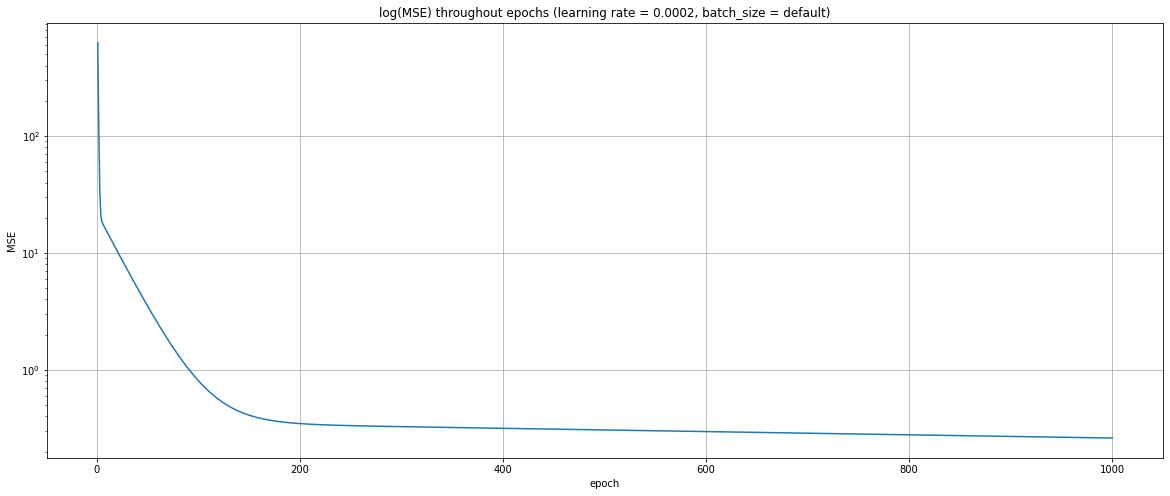

In [ ]:
loss, _ = linear4csv(
    x_data = data[:, :8],
    y_data = data[:, 8],
    learning_rate = 2e-5,
)
f = plt.figure(1, figsize=(20, 8))
plt.plot(range(1, len(loss)+1), loss)
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.yscale('log')
plt.title(f"log(MSE) throughout epochs (learning rate = {learning_rate}, batch_size = default)");
plt.grid()

### 4. Czy dany zbiór jest liniowy? Co na to wskazuje?


In [ ]:
loss, params = linear4csv(
    x_data = data[:, :8],
    y_data = data[:, 8],
    learning_rate = 2e-5,
)
def f(x, params):
    return np.dot(x, params[0]) + params[1]

print("true y, predicted y, abs(predicted y - true y)")
for i in range(20):
    x = data[i, :8]
    y = data[i, 8]
    y_predicted = f(x, params)
    print(f"{y}, \t{y_predicted:6.3f}, \t{abs(y_predicted - y):6.3f}")

true y, predicted y, abs(predicted y - true y)
3.0, 	 2.820, 	 0.180
3.0, 	 2.880, 	 0.120
1.0, 	 1.854, 	 0.854
3.0, 	 3.044, 	 0.044
0.0, 	-0.261, 	 0.261
1.0, 	 1.748, 	 0.748
0.0, 	-1.282, 	 1.282
0.0, 	 1.453, 	 1.453
0.0, 	-2.850, 	 2.850
1.0, 	 1.702, 	 0.702
2.0, 	 2.936, 	 0.936
1.0, 	 1.830, 	 0.830
0.0, 	 0.177, 	 0.177
4.0, 	 3.731, 	 0.269
3.0, 	 2.987, 	 0.013
1.0, 	 1.594, 	 0.594
1.0, 	 1.605, 	 0.605
3.0, 	 3.031, 	 0.031
3.0, 	 3.161, 	 0.161
2.0, 	 2.059, 	 0.059


W celu zbadania liniowości przebadano prawdziwą wartość na wyjściu oraz tę przewidzianą przez regresję, a następnie obliczono moduł z tej różnicy. Jeśli zbiór jest liniowy, to obie wartości powinny się zgadzać w pewnym przybliżeniu (to przybliżenie czyli swego rodzaju ,,odchylenie'' od prawdziwej wartości informuje jak dobre jest dopasowanie - im bliższe 0 tym lepsze). Poniżej zamieszczono również pairplot w celu przebadania par zależności między każdymi cechami, gdzie widać pewne zależności (liniowe).

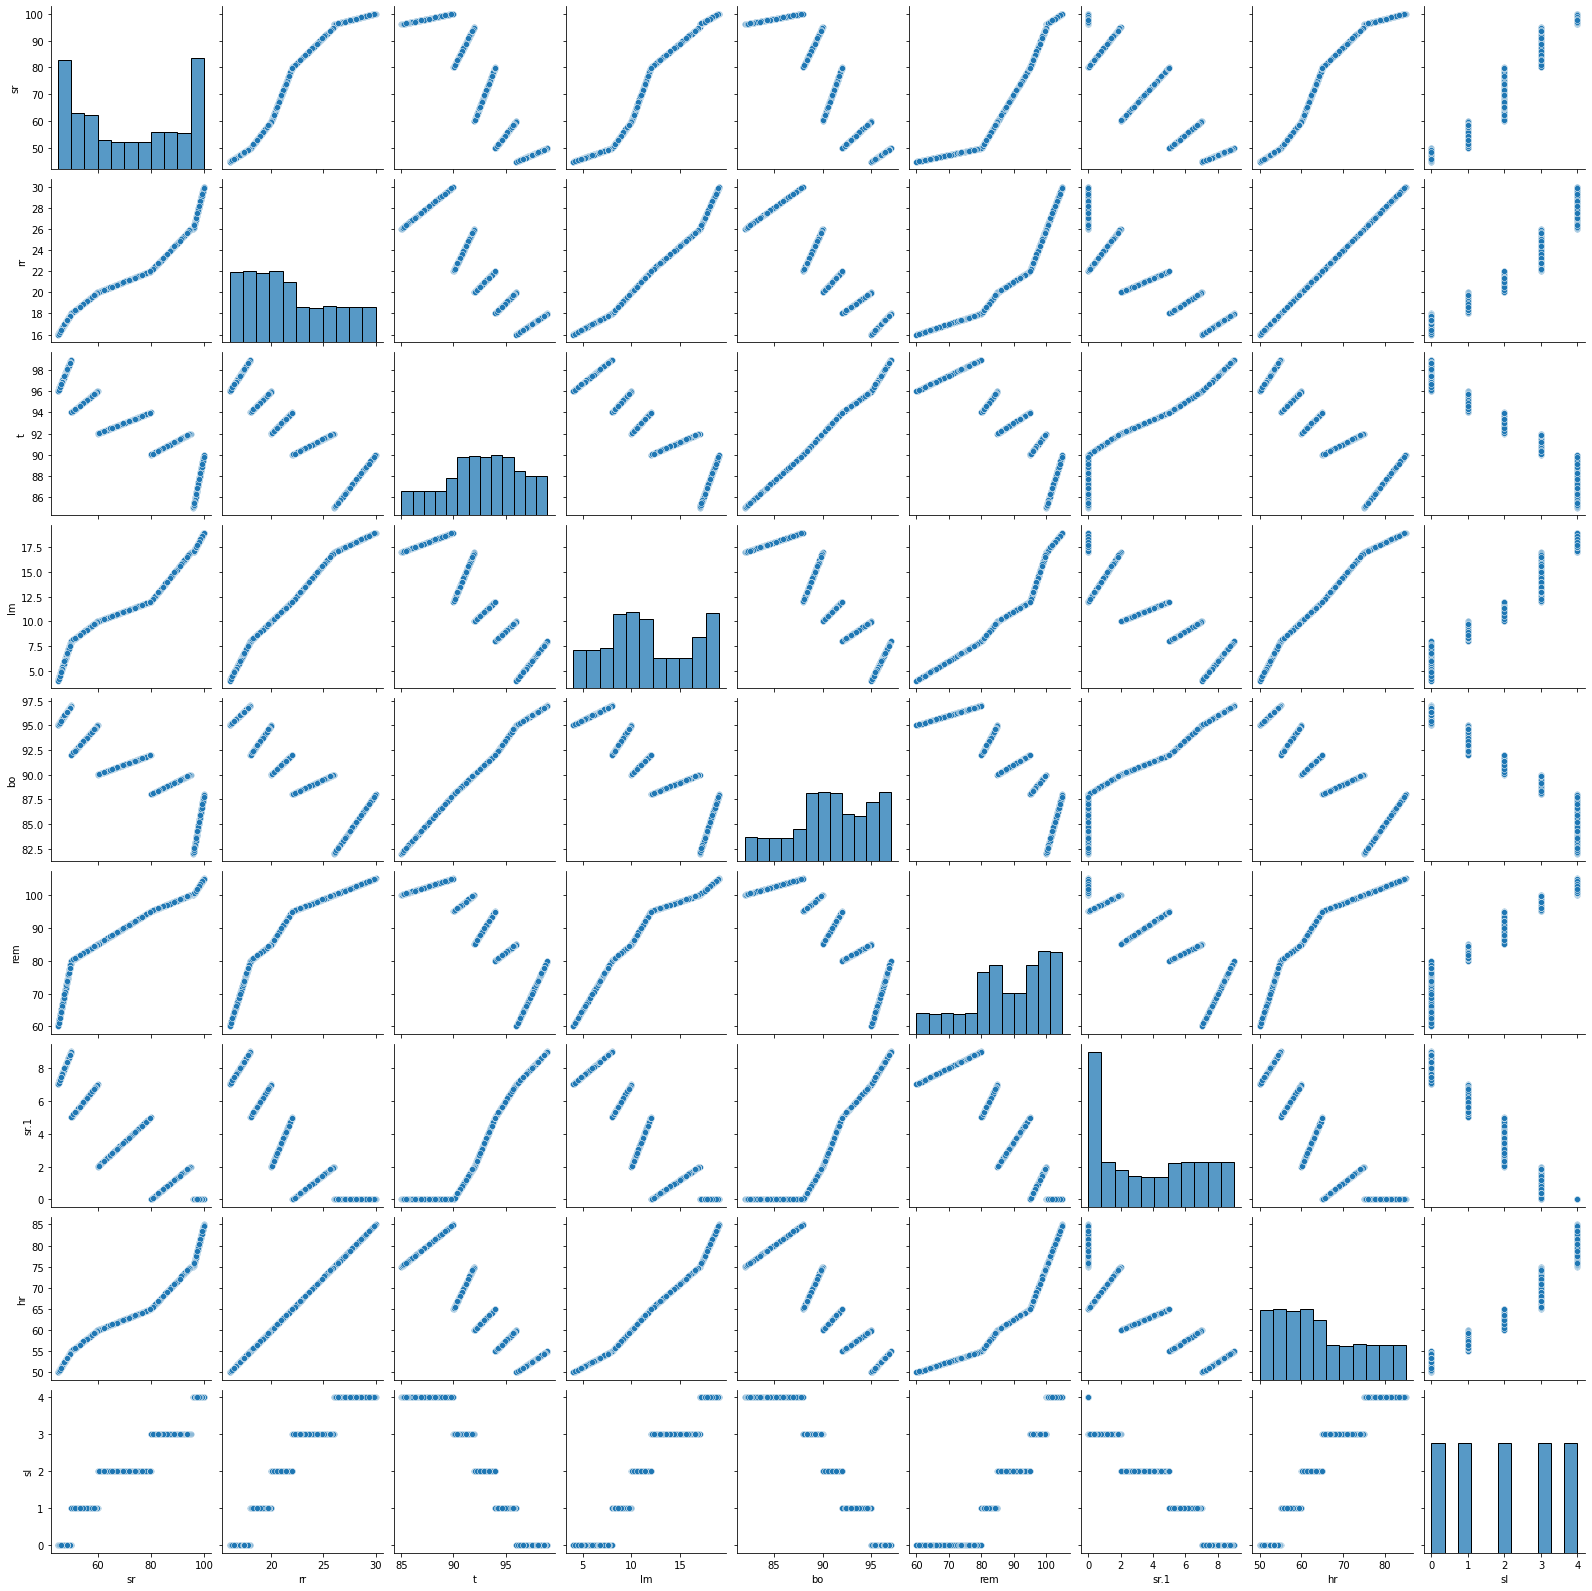

In [ ]:
import seaborn as sns
sns.pairplot(data=df)

### 5. Zbadaj wpływ liczby przypadków biorących udział w treningu (dodatkowe)

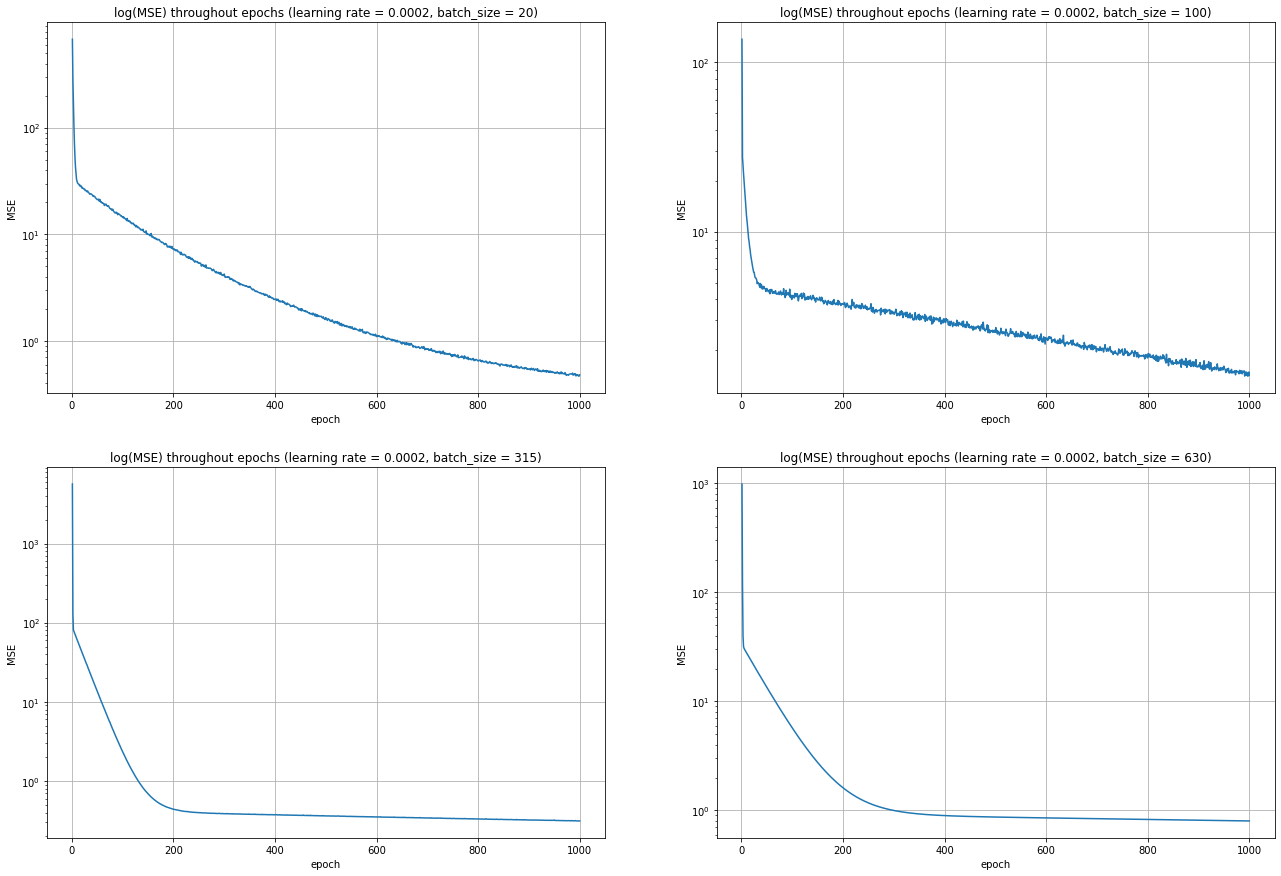

In [ ]:
batch_sizes = [20, 100, 315, 630]
# batch_sizes = [1, 2, 4, 6, 8, 10]

f = plt.figure(1, figsize=(22, 15))

for i, bs in enumerate(batch_sizes):
    loss, _ = linear4csv(
        x_data = data[:, :8],
        y_data = data[:, 8],
        learning_rate = 1e-5,
        batch_size = bs
    )
    f.add_subplot(len(batch_sizes)//2, 2, i+1)
    plt.plot(range(1, len(loss)+1), loss)
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.yscale('log')
    plt.title(f"log(MSE) throughout epochs (learning rate = {learning_rate}, batch_size = {bs})");
    plt.grid()

`batch_size` ma wpływ na szybkość przetwarzania danych jak i końcowy kształt wykresu

### 6. Zbadaj wpływ ety (`learning_rate`) na szybkość i dokładność treningu (dodatkowe)

`batch_size = default`

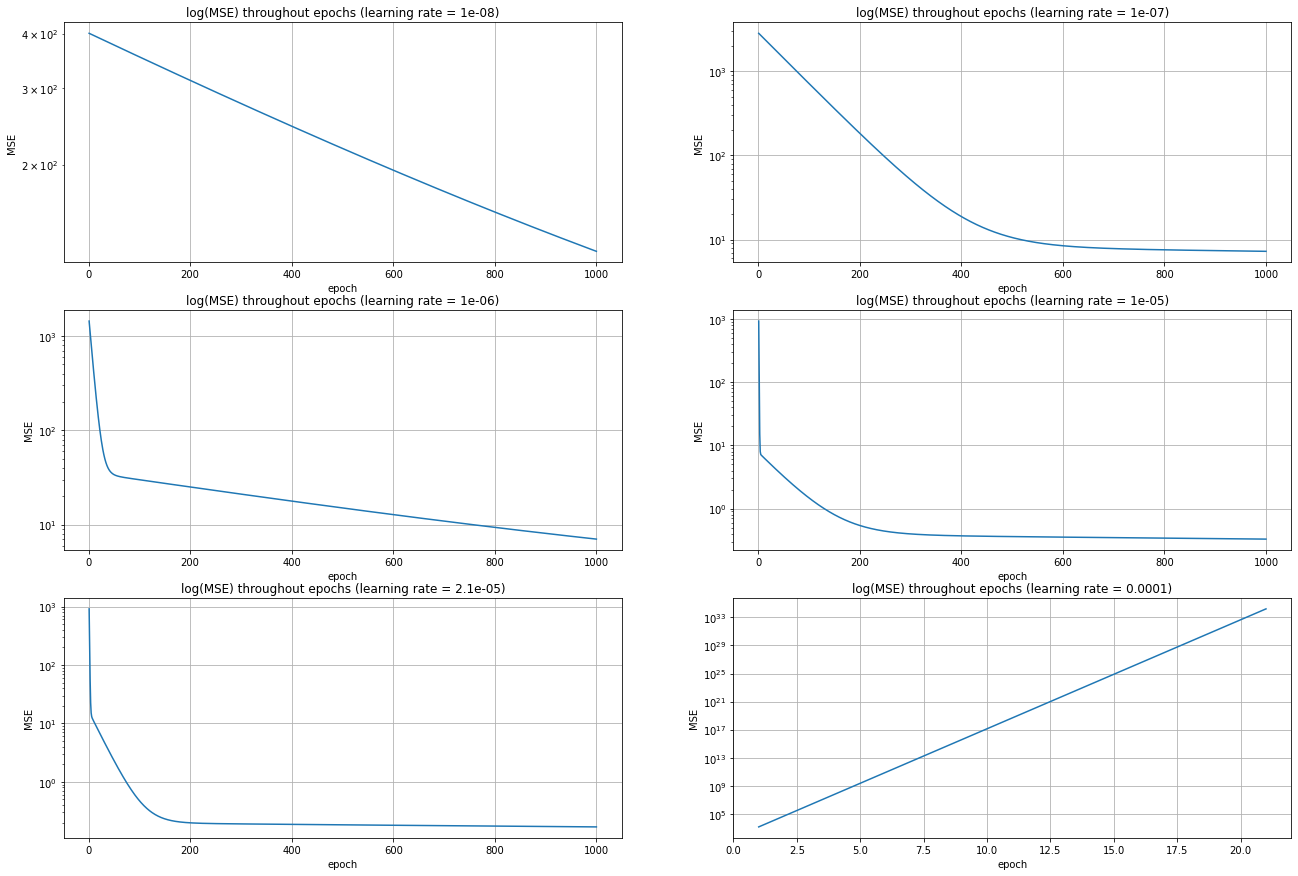

In [ ]:
learning_rates = [1e-8, 1e-7, 1e-6, 1e-5, 2.1e-5, 1e-4,]

f = plt.figure(1, figsize=(22, 15))

for i, lr in enumerate(learning_rates):
    loss, _ = linear4csv(
        x_data = data[:, :8],
        y_data = data[:, 8],
        learning_rate = lr
    )
    f.add_subplot(3, 2, i+1)
    plt.plot(range(1, len(loss)+1), loss)
    plt.xlabel("epoch")
    plt.ylabel("MSE")
    plt.yscale('log')
    plt.title(f"log(MSE) throughout epochs (learning rate = {lr})");
    plt.grid()

Jak widać na rysunkach zbyt mały hiperparametr `learning_rate` powoduje bardzo powolne zmiany błędu, przez co trzeba zwiększyć liczbę epok, aby osiągnąć dążenie wartości funkcji straty (w tym przypadku *MSE*) do jak najmniejszej wartości. W przypadku zbyt dużej wartości tegoż hiperparametru funkcja straty ,,wystrzeliwuje'' w olbrzymie wartości, co związane jest z błądzeniem przy szukaniu funkcji straty (zbyt duże kroki przy rozwiązywaniu problemu $\nabla loss = 0$). W tym przypadku optymalne wartości współczynnika uczenia są rzędu $10^{-6}, 10^{-5}$ ale mniejsze niż $10^{-4}$.